# Step 1: Topic Selection
#### **Research Topic: Sentiment Analysis on data related to immigration reforms, collected from X (Twitter).**



## Importing Libraries

In [4]:
import tweepy
import nltk
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
words = set(nltk.corpus.words.words())

# Step 2: Crawl Dataset from X(twitter) or similar

## Data Extraction

In [51]:
consumer_key = "***"
consumer_secret = "***"
access_key = "***"
access_secret = "***"

In [93]:
def printtweetdata(n, ith_tweet):
	print()
	print(f"Tweet {n}:")
	print(f"Tweet Text:{ith_tweet[0]}")


def scrape():
	db = pd.DataFrame(columns=['text'])
	tweets = tweepy.Cursor(api.search_tweets, q="#immigrationlaw", count=5000, lang="en",
						since="2019-01-01",tweet_mode='extended').items()
	list_tweets = [tweet for tweet in tweets]
	i = 1
	for tweet in list_tweets:
		hashtags = tweet.entities['hashtags']
		try:
			text = tweet.retweeted_status.full_text
		except AttributeError:
			text = tweet.full_text
		hashtext = list()
		for j in range(0, len(hashtags)):
			hashtext.append(hashtags[j]['text'])
		ith_tweet = [text]
		db.loc[len(db)] = ith_tweet
		printtweetdata(i, ith_tweet)
		i = i+1
	filename = 'immigration.csv'
	db.to_csv(filename)

In [94]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)
scrape()
print('Scraping has completed!')


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since



Tweet 1:
Tweet Text:#Immigration has once again become an area of focus for the #BidenAdministration. #InterviewWaiver options in #India, #I485 update, #deportation policy change, and more! https://t.co/BhevuqGzsX

#I751 #USTravelDocs #DHS #I9 #USVisaApplicants #I140 #immigrationlaw https://t.co/PztzQRibXj

Tweet 2:
Tweet Text:Law Students Help Ukrainian Refugees Start Asylum Process – The Seattle U Newsroom – News, stories and more

ChronLaw Immigration Law News
at https://t.co/EZit6TuyZi

#ImmigrationLaw #news #law #attorney #lawyer

Tweet 3:
Tweet Text:| purpose | through storytelling. Catch us while you can! #extended #artandadvocacy #immigration #immigrationlaw #theaterlife @ Fountain Theatre https://t.co/jwi6rczhP6

Tweet 4:
Tweet Text:Mandatory Use of Electronic System for Travel Authorization for Visitors on #Visa #Immigration Waiver Program #ImmigrationLaw https://t.co/FByS6oXCiA  @RefugeeCongress

Tweet 5:
Tweet Text:Mandatory Use of Electronic System for Travel Authorizatio

In [100]:
import glob
import os

In [101]:
files = os.path.join("immigration*.csv")
files = glob.glob(files)
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df

,Unnamed: 0,text
0,0.0,"In this video, I answer the question:\nApplyin..."
1,1.0,Susan Rice and Ron Klain appear to be the prob...
2,2.0,Susan Rice and Ron Klain appear to be the prob...
3,3.0,Susan Rice and Ron Klain appear to be the prob...
4,4.0,Call us today for any of your immigration need...
...,...,...
21528,4474.0,Local elections coming along on May 5th. Shoul...
21529,4475.0,Disposal date for #Everify records has changed...
21530,4476.0,Why is the government paying out performance b...
21531,4477.0,Demography is destiny!\n\nThe maps below show ...


In [102]:
df = df.drop(columns=['Unnamed: 0'])


In [103]:
df

,text
0,"In this video, I answer the question:\nApplyin..."
1,Susan Rice and Ron Klain appear to be the prob...
2,Susan Rice and Ron Klain appear to be the prob...
3,Susan Rice and Ron Klain appear to be the prob...
4,Call us today for any of your immigration need...
...,...
21528,Local elections coming along on May 5th. Shoul...
21529,Disposal date for #Everify records has changed...
21530,Why is the government paying out performance b...
21531,Demography is destiny!\n\nThe maps below show ...


In [104]:
df.to_csv("data/initial_scrape.csv")

## Text Preprocessing

In [3]:
df = pd.read_csv("data/sample_scrape.csv")
df.shape 

(6328, 1)

In [4]:
df 

,text
0,video answer question applying f 1 visa embass...
1,susan rice ron klain appear problem getting ad...
2,call us today immigration needs 262 764 5036 p...
3,conservatives libertarians democrats saying ti...
4,bipartisan group us senators introduced bill p...
...,...
6323,immigration breakdown open borders working kee...
6324,dream make true us study australia contact us ...
6325,immigrants continue essential need deliver pro...
6326,new 50 immigrant leaders across country urging...


Removing Twitter Handles (@user)

In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt 

In [13]:
# remove twitter handles (@user)
df['tidy_text'] = np.vectorize(remove_pattern)(str(df['text']), "@[\w]*")

In [18]:
df = df['tidy_text']

In [19]:
df

0       0       Learn #Occult #magic #HausGaGa #Wizard...
1       0       Learn #Occult #magic #HausGaGa #Wizard...
2       0       Learn #Occult #magic #HausGaGa #Wizard...
3       0       Learn #Occult #magic #HausGaGa #Wizard...
4       0       Learn #Occult #magic #HausGaGa #Wizard...
                              ...                        
9943    0       Learn #Occult #magic #HausGaGa #Wizard...
9944    0       Learn #Occult #magic #HausGaGa #Wizard...
9945    0       Learn #Occult #magic #HausGaGa #Wizard...
9946    0       Learn #Occult #magic #HausGaGa #Wizard...
9947    0       Learn #Occult #magic #HausGaGa #Wizard...
Name: tidy_text, Length: 9948, dtype: object

In [59]:
def preprocess(raw_text):    
    text_mention = re.sub(r'@[A-Za-z0-9]+',' ', raw_text) # Removed @mentions    
    text_hashtag = re.sub(r'#', ' ', text_mention) #Removing the '#' symbol
    RT_text = re.sub(r'RT[\s]+', ' ', text_hashtag) # Removing RT
    text_http = re. sub(r'https?:\/\/\S+', ' ', RT_text)     # Remove the hyper link
    letters_only_text = re.sub("[^a-zA-Z0-9]", ' ', text_http)  # keep only text
    words = letters_only_text.lower().split()     # convert to lower case and split 
    stopword_set = set(stopwords.words("english"))     # remove stopwords
    meaningful_words = [w for w in words if w not in stopword_set] #keep only meaningful words
    cleaned_word_list = " ".join(meaningful_words)     # join the cleaned words in a list

    return cleaned_word_list

For each text entry, remove @mentions, '#' symbols, ReTweets, hyperlinks, stopwords. And keep only meaningfull words of text type in lower case. 

In [60]:
def process_data(dataset):
    tweets_df = pd.read_csv(dataset)
    tweets_df = tweets_df.dropna()
    num_tweets = tweets_df.shape[0]
    print(tweets_df)
    print("Total tweets: " + str(num_tweets))
    cleaned_tweets = []

    print("Beginning pre-processing of tweets ")
    for i in range(num_tweets):
        cleaned_tweet = preprocess(tweets_df.iloc[i][1])
        cleaned_tweets.append(cleaned_tweet)
        if(i % 100 == 0):
            print(str(i) + " tweets processed")
    print("Finished processing of tweets ")
    return cleaned_tweets


In [105]:
cleaned_data = process_data("data/inital_scrape.csv")
df = pd.DataFrame(cleaned_data)
df.drop_duplicates(subset=None, inplace=True)
df.to_csv('charvi.csv')

       Unnamed: 0                                               text
0               0  In this video, I answer the question:\nApplyin...
1               1  Susan Rice and Ron Klain appear to be the prob...
2               2  Susan Rice and Ron Klain appear to be the prob...
3               3  Susan Rice and Ron Klain appear to be the prob...
4               4  Call us today for any of your immigration need...
...           ...                                                ...
21528       21528  Local elections coming along on May 5th. Shoul...
21529       21529  Disposal date for #Everify records has changed...
21530       21530  Why is the government paying out performance b...
21531       21531  Demography is destiny!\n\nThe maps below show ...
21532       21532  Local elections coming along on May 5th. Shoul...

[21533 rows x 2 columns]
Total tweets: 21533
Beginning pre-processing of tweets 
0 tweets processed
100 tweets processed
200 tweets processed
300 tweets processed
400 twee

In [23]:
cleaned_data = process_data("data/preprocess_this.csv")
df = pd.DataFrame(cleaned_data)
df.to_csv('data/cleaned_preprocessed.csv')

Total tweets: 3674
Beginning pre-processing of tweets 
0 tweets processed
100 tweets processed
200 tweets processed
300 tweets processed
400 tweets processed
500 tweets processed
600 tweets processed
700 tweets processed
800 tweets processed
900 tweets processed
1000 tweets processed
1100 tweets processed
1200 tweets processed
1300 tweets processed
1400 tweets processed
1500 tweets processed
1600 tweets processed
1700 tweets processed
1800 tweets processed
1900 tweets processed
2000 tweets processed
2100 tweets processed
2200 tweets processed
2300 tweets processed
2400 tweets processed
2500 tweets processed
2600 tweets processed
2700 tweets processed
2800 tweets processed
2900 tweets processed
3000 tweets processed
3100 tweets processed
3200 tweets processed
3300 tweets processed
3400 tweets processed
3500 tweets processed
3600 tweets processed
Finished processing of tweets 


We remove single letter words separately

In [9]:
df = pd.read_csv("data/merged_preprocessed.csv")

In [10]:
df['text'] = df['text'].str.replace("[^a-zA-Z0-9#]", " ")

<ipython-input-10-a0a3a79be45a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[^a-zA-Z0-9#]", " ")


In [11]:
df

,text
0,learn #occult #magic #hausgaga #wizard #count ...
1,learn project partnership opportunities #immig...
2,equally absurd thousands unlawful #immigrants ...
3,reflecting forms #radical #protectionism chan...
4,omax immigration inc #immigration #visa #cana...
...,...
7845,dream make true us study australia contact us...
7846,sun rising east wtk xrp #ripple #masterca...
7847,entry permit different uae residence visa fin...
7848,india s #rupay card facilitator acceptable e...


Removing Short Words

In [12]:
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [13]:
df

,text
0,learn #occult #magic #hausgaga #wizard #count ...
1,learn project partnership opportunities #immig...
2,equally absurd thousands unlawful #immigrants ...
3,reflecting forms #radical #protectionism chann...
4,omax immigration #immigration #visa #canada #s...
...,...
7845,dream make true study australia contact inform...
7846,rising east #ripple #mastercard #visa #metaver...
7847,entry permit different residence visa find #vi...
7848,india #rupay card facilitator acceptable even ...


In [14]:
tokenized_tweet = df['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [learn, #occult, #magic, #hausgaga, #wizard, #...
1    [learn, project, partnership, opportunities, #...
2    [equally, absurd, thousands, unlawful, #immigr...
3    [reflecting, forms, #radical, #protectionism, ...
4    [omax, immigration, #immigration, #visa, #cana...
Name: text, dtype: object

In [15]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [learn, #occult, #magic, #hausgaga, #wizard, #...
1    [learn, project, partnership, opportun, #immig...
2    [equal, absurd, thousand, unlaw, #immigr, cros...
3    [reflect, form, #radic, #protection, channel, ...
4    [omax, immigr, #immigr, #visa, #canada, #study...
Name: text, dtype: object

In [16]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['text'] = tokenized_tweet

In [17]:
df.to_csv("data/final_dataset.csv")

In [16]:
def single_letters(raw_text):
    cleaned_word_list = ' '.join( [w for w in raw_text.split() if len(w)>1] )
    return cleaned_word_list

def process_data(dataset):
    tweets_df = pd.read_csv(dataset)
    tweets_df = tweets_df.dropna()
    num_tweets = tweets_df.shape[0]
    print("Total tweets: " + str(num_tweets))

    cleaned_tweets = []
    print("Removing Single Letters from tweets ")
    for i in range(num_tweets):
        cleaned_tweet = single_letters(tweets_df.iloc[i][0])
        cleaned_tweets.append(cleaned_tweet)
        if(i % 100 == 0):
            print(str(i) + " tweets processed")
    print("Finished processing of tweets ")
    return cleaned_tweets

cleaned_data = process_data("data/preprocessed_dataset_visa.csv")
data = pd.DataFrame(cleaned_data)
df.to_csv('data/preprocessed_single_dataset_visa.csv')

Total tweets: 2798
Removing Single Letters from tweets 
0 tweets processed
100 tweets processed
200 tweets processed
300 tweets processed
400 tweets processed
500 tweets processed
600 tweets processed
700 tweets processed
800 tweets processed
900 tweets processed
1000 tweets processed
1100 tweets processed
1200 tweets processed
1300 tweets processed
1400 tweets processed
1500 tweets processed
1600 tweets processed
1700 tweets processed
1800 tweets processed
1900 tweets processed
2000 tweets processed
2100 tweets processed
2200 tweets processed
2300 tweets processed
2400 tweets processed
2500 tweets processed
2600 tweets processed
2700 tweets processed
Finished processing of tweets 


Removal of random words which carry no meaning.

In [20]:
def process_data(dataset):
    tweets_df = pd.read_csv(dataset)
    tweets_df = tweets_df.dropna()
    num_tweets = tweets_df.shape[0]
    print("Total tweets: " + str(num_tweets))

    cleaned_tweets = []
    print("Beginning processing of tweets ")
    for i in range(num_tweets):
        cleaned_tweet = meaningless_words(tweets_df.iloc[i][0])
        cleaned_tweets.append(cleaned_tweet)
        if(i % 1000 == 0):
            print(str(i) + " tweets processed")
    print("Finished processing of tweets ")
    return cleaned_tweets


def meaningless_words(raw_text):
    raw_text=str(raw_text)
    return " ".join(w for w in nltk.wordpunct_tokenize(raw_text) \
     if w.lower() in words or not w.isalpha())

# Rechecking
# cleaned_data = process_data("final.csv")
# df = pd.DataFrame(cleaned_data)
# df.to_csv('meaning_final.csv')

Total tweets: 3674
Beginning processing of tweets 
0 tweets processed
1000 tweets processed
2000 tweets processed
3000 tweets processed
Finished processing of tweets 


Dropping duplicate entries

In [19]:
file_name = "data/cleaning_set.csv"
file_name_output = "data/final.csv"

df = pd.read_csv(file_name)
df.drop_duplicates(subset=None, inplace=True)
df.to_csv(file_name_output, index=False)

## Sentiment Analysis

In [5]:
df = pd.read_csv("data/sample_scrape.csv")
df.shape

(6328, 1)

In [6]:
df

,text
0,video answer question applying f 1 visa embass...
1,susan rice ron klain appear problem getting ad...
2,call us today immigration needs 262 764 5036 p...
3,conservatives libertarians democrats saying ti...
4,bipartisan group us senators introduced bill p...
...,...
6323,immigration breakdown open borders working kee...
6324,dream make true us study australia contact us ...
6325,immigrants continue essential need deliver pro...
6326,new 50 immigrant leaders across country urging...


To get a visualization of the most frequent words from this topic

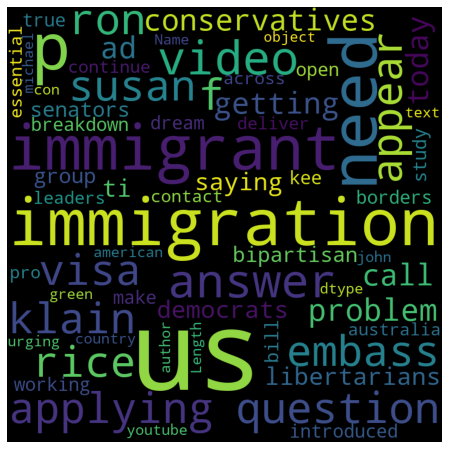

In [6]:
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not',
             'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']

wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df['text']))

fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Step 3: Use the Sentic Net polarity classification API 

In [4]:
df1  = df.iloc[0:1000]
df2  = df.iloc[1001:2000]
df3  = df.iloc[2001:3000] 
df4  = df.iloc[3001:4000]
df5  = df.iloc[4001:5000]
df6  = df.iloc[5001:6000]
df7  = df.iloc[6001:6328]

In [17]:
import requests

LANG = 'en'
APIKEY = '***'
APIURL = 'https://sentic.net/api/' + LANG + '/' + APIKEY + '.py?text='

def process_data(tweets_df):
    tweets_df = tweets_df.dropna()
    num_tweets = tweets_df.shape[0]
    print("Total tweets: " + str(num_tweets))
    print("Beginning processing of tweets ")
    print(tweets_df.iloc[0][0])
    label_tweets=[]
    for i in range(num_tweets):
        label = polarity_api(tweets_df.iloc[i][0])
        label_tweets.append(label)
        if(i % 100 == 0):
            print(str(i) + " tweets processed")
    print("Finished processing of tweets ")
    return label_tweets

def polarity_api(raw_text):
    text=raw_text
    for c in [';', '&', '#', '{', '}']: text = text.replace(c, ':')
    label = str(requests.get(APIURL + text).content)[2:-3]
    return label
    
labels = process_data(df7) 
df7['sentic_polarity']=labels
df7.head()

Total tweets: 327
Beginning processing of tweets 
others quoting similar watch dare politicslive asylum immigration
0 tweets processed
100 tweets processed
200 tweets processed
300 tweets processed
Finished processing of tweets 


<ipython-input-17-f19737d364fb>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['sentic_polarity']=labels


,text,sentic_polarity
6001,others quoting similar watch dare politicslive...,NEGATIVE
6002,agree education learning institutions certific...,POSITIVE
6003,politicslive sounding like less informed offsp...,POSITIVE
6004,looking immigration lawyers luton visit websit...,POSITIVE
6005,go immigration politicslive,NEUTRAL


In [18]:
df7.to_csv('data/polarity_labelled7.csv')

In [29]:
df1 = pd.read_csv("data/polarity_labelled1.csv")

In [34]:
df1.drop(columns=["Unnamed: 0"])

,text,sentic_polarity
0,video answer question applying f 1 visa embass...,POSITIVE
1,susan rice ron klain appear problem getting ad...,POSITIVE
2,call us today immigration needs 262 764 5036 p...,POSITIVE
3,conservatives libertarians democrats saying ti...,POSITIVE
4,bipartisan group us senators introduced bill p...,POSITIVE
...,...,...
995,interested migrate canada skills lots opportun...,POSITIVE
996,supposed choose one works immigration,POSITIVE
997,im day every day immigration core nation nativ...,POSITIVE
998,immigration issue used amp abused gave amnesty...,POSITIVE


In [35]:
frames = [df1, df2, df3, df4, df5, df6, df7]
  
result = pd.concat(frames)

In [36]:
result.to_csv("data/Polarity_Labelled_SenticNet.csv")

In [38]:
result.drop(columns=['Unnamed: 0'])

,text,sentic_polarity
0,video answer question applying f 1 visa embass...,POSITIVE
1,susan rice ron klain appear problem getting ad...,POSITIVE
2,call us today immigration needs 262 764 5036 p...,POSITIVE
3,conservatives libertarians democrats saying ti...,POSITIVE
4,bipartisan group us senators introduced bill p...,POSITIVE
...,...,...
6323,immigration breakdown open borders working kee...,POSITIVE
6324,dream make true us study australia contact us ...,POSITIVE
6325,immigrants continue essential need deliver pro...,POSITIVE
6326,new 50 immigrant leaders across country urging...,POSITIVE


# Step 4: Report any encountered issues, e.g., mislabelled tweets

In [1]:
import pandas as pd
data=pd.read_csv('data/Polarity_Labelled_SenticNet.csv')

In [2]:
data

,text,sentic_polarity
0,video answer question applying f 1 visa embass...,POSITIVE
1,susan rice ron klain appear problem getting ad...,POSITIVE
2,call us today immigration needs 262 764 5036 p...,POSITIVE
3,conservatives libertarians democrats saying ti...,POSITIVE
4,bipartisan group us senators introduced bill p...,POSITIVE
...,...,...
6317,immigration breakdown open borders working kee...,POSITIVE
6318,dream make true us study australia contact us ...,POSITIVE
6319,immigrants continue essential need deliver pro...,POSITIVE
6320,new 50 immigrant leaders across country urging...,POSITIVE


In [4]:
print(data['sentic_polarity'].unique())
print(data['sentic_polarity'].isna().sum())

['POSITIVE' 'NEGATIVE' 'NEUTRAL']
0


Encountered Issue: JS Error for some entries; polarity not identified

In [6]:
data['sentic_polarity'].value_counts()

POSITIVE    4921
NEGATIVE    1319
NEUTRAL       82
Name: sentic_polarity, dtype: int64

In [102]:
df.shape

(2495, 4)

from sklearn.preprocessing import label_binarize

df_labelled[['is_neg', 'is_neutral', 'is_pos']] = pd.DataFrame(label_binarize(df_labelled['label'], [-1, 0, 1]), index=df_labelled.index)

df_labelled.head(10)

In [7]:
positive_sentiments = data[data['sentic_polarity']=='POSITIVE']
negative_sentiments = data[data['sentic_polarity']=='NEGATIVE']
neutral_sentiments = data[data['sentic_polarity']=='NEUTRAL']



In [10]:
wordcloud_pos = WordCloud(background_color='black').generate(positive_sentiments['text'].to_string())
wordcloud_neg = WordCloud(background_color='black').generate(negative_sentiments['text'].to_string())
wordcloud_neu = WordCloud(background_color='black').generate(neutral_sentiments['text'].to_string())

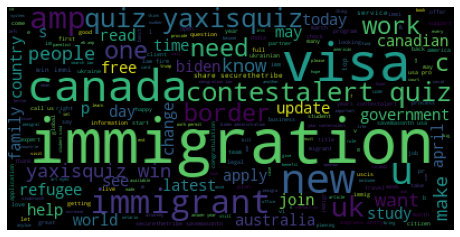

In [11]:
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

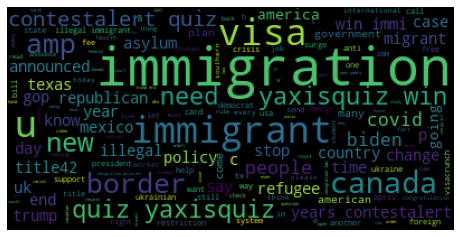

In [12]:
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

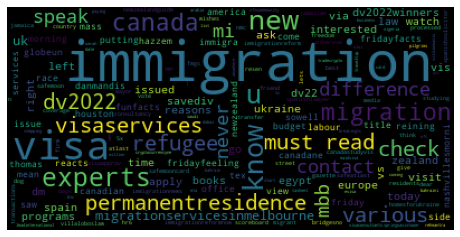

In [13]:
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud_neu)
plt.axis('off')
plt.show()

### Vader Sentiment

In [5]:
import seaborn as sns
plt.style.use('fivethirtyeight')
cp = sns.color_palette( )

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
emptyline=[]
for row in data ['text']:
    vs=analyzer.polarity_scores(row)
    emptyline. append(vs)

# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.901,0.099,0.2960
1,0.135,0.750,0.115,-0.1027
2,0.000,1.000,0.000,0.0000
3,0.000,0.845,0.155,0.0258
4,0.179,0.756,0.065,-0.5106


In [8]:
# Convert scores into positive and negetive sentiments using some threshold
vader_sentiments = []
for i in df_sentiments.index:
    if df_sentiments['compound'][i] > 0:
       vader_sentiments.append('POSITIVE')
    elif df_sentiments['compound'][i] <0:
        vader_sentiments.append('NEGATIVE')
    else: vader_sentiments.append('NEUTRAL')
data['vader_sentiments']=vader_sentiments
data.head(20)

,text,sentic_polarity,vader_sentiments
0,video answer question applying f 1 visa embass...,POSITIVE,POSITIVE
1,susan rice ron klain appear problem getting ad...,POSITIVE,NEGATIVE
2,call us today immigration needs 262 764 5036 p...,POSITIVE,NEUTRAL
3,conservatives libertarians democrats saying ti...,POSITIVE,POSITIVE
4,bipartisan group us senators introduced bill p...,POSITIVE,NEGATIVE
5,join celebrate bold legacy 50 years work puert...,POSITIVE,POSITIVE
6,check unmosqued documentary film immigrant fou...,POSITIVE,NEUTRAL
7,story keeper gives us insight childhood looks ...,POSITIVE,POSITIVE
8,love travel schengen europe trending visa visa...,POSITIVE,POSITIVE
9,tariff reductions immigration help fight infla...,POSITIVE,POSITIVE


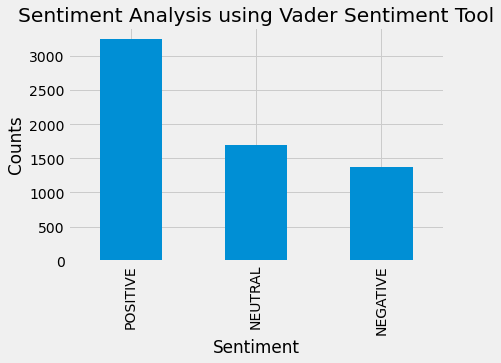

In [64]:
#Show the value counts
data['vader_sentiments'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis using Vader Sentiment Tool' )
plt.xlabel( 'Sentiment' )
plt.ylabel( 'Counts' )
data['vader_sentiments'].value_counts( ).plot(kind= 'bar')
plt.show( )

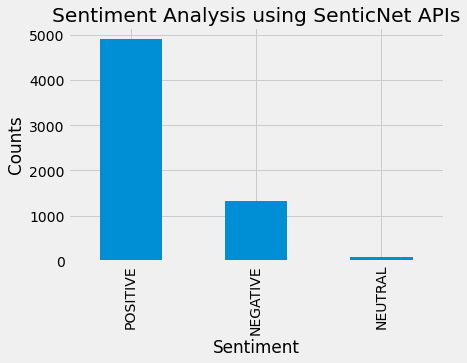

In [62]:
#Show the value counts
data['sentic_polarity'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis using SenticNet APIs' )
plt.xlabel( 'Sentiment' )
plt.ylabel( 'Counts' )
data['sentic_polarity'].value_counts( ).plot(kind= 'bar')
plt.show( )

### TextBlob Sentiments

In [9]:
from textblob import TextBlob

In [10]:
# Create a function to get the subjectivity
def getSubjectivity (text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity (text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
data['textblob_subjectivity'] = data['text'].apply(getSubjectivity)
data['textblob_polarity'] = data['text'].apply(getPolarity)


In [19]:
data

,text,sentic_polarity,vader_sentiments,textblob_subjectivity,textblob_polarity
0,video answer question applying f 1 visa embass...,POSITIVE,POSITIVE,0.000000,0.000000
1,susan rice ron klain appear problem getting ad...,POSITIVE,NEGATIVE,0.000000,0.000000
2,call us today immigration needs 262 764 5036 p...,POSITIVE,NEUTRAL,0.000000,0.000000
3,conservatives libertarians democrats saying ti...,POSITIVE,POSITIVE,0.000000,0.000000
4,bipartisan group us senators introduced bill p...,POSITIVE,NEGATIVE,0.000000,0.000000
...,...,...,...,...,...
6317,immigration breakdown open borders working kee...,POSITIVE,NEUTRAL,0.500000,0.000000
6318,dream make true us study australia contact us ...,POSITIVE,POSITIVE,0.325000,0.175000
6319,immigrants continue essential need deliver pro...,POSITIVE,POSITIVE,0.300000,0.000000
6320,new 50 immigrant leaders across country urging...,POSITIVE,POSITIVE,0.277273,0.118182


In [11]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis (score):
    if score < 0:
        return 'NEGATIVE'
    elif score == 0:
        return 'NEUTRAL'
    else: return 'POSITIVE'

data['textblob_analysis'] = data['textblob_polarity' ].apply(getAnalysis)
data

,text,sentic_polarity,vader_sentiments,textblob_subjectivity,textblob_polarity,textblob_analysis
0,video answer question applying f 1 visa embass...,POSITIVE,POSITIVE,0.000000,0.000000,NEUTRAL
1,susan rice ron klain appear problem getting ad...,POSITIVE,NEGATIVE,0.000000,0.000000,NEUTRAL
2,call us today immigration needs 262 764 5036 p...,POSITIVE,NEUTRAL,0.000000,0.000000,NEUTRAL
3,conservatives libertarians democrats saying ti...,POSITIVE,POSITIVE,0.000000,0.000000,NEUTRAL
4,bipartisan group us senators introduced bill p...,POSITIVE,NEGATIVE,0.000000,0.000000,NEUTRAL
...,...,...,...,...,...,...
6317,immigration breakdown open borders working kee...,POSITIVE,NEUTRAL,0.500000,0.000000,NEUTRAL
6318,dream make true us study australia contact us ...,POSITIVE,POSITIVE,0.325000,0.175000,POSITIVE
6319,immigrants continue essential need deliver pro...,POSITIVE,POSITIVE,0.300000,0.000000,NEUTRAL
6320,new 50 immigrant leaders across country urging...,POSITIVE,POSITIVE,0.277273,0.118182,POSITIVE


In [12]:
data.to_csv("data/Compare_Polarity_Results.csv")

In [13]:
data = pd.read_csv("data/Compare_Polarity_Results.csv")

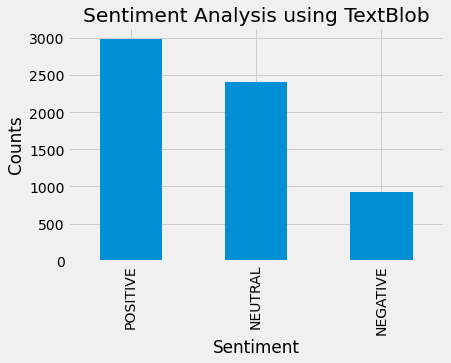

In [60]:
#Show the value counts
data['textblob_analysis'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis using TextBlob' )
plt.xlabel( 'Sentiment' )
plt.ylabel( 'Counts' )
data['textblob_analysis'].value_counts( ).plot(kind= 'bar')
plt.show( )

In [22]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = data.loc[data.textblob_polarity == 1, ['text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

hiring alert excellent chance immigration counsellor excellent communication skills experience job portals call us 85560 85560 additional information hiring jobs jobvacancy jobsearch jobopportunity nowhiring visa immigration
best study visa consultant best visa agent refusal expert crown immigration satish kumar study visa immigration consultant
sf bound chicago airport immigration jam packed could learn put mobile pass faster immigration sfo best experience immigration experience uk immigration lhr nailed immigration heathrow ord
canada clicks bonus points whoever guess name marvelous place canada immigration immigrationcanada immigrationlawyer immigratetocanada immigrationconsultant zsrimmigration
germany perfect place visit anyone mater like germany country germany travel tourism visa visitgermany schengen


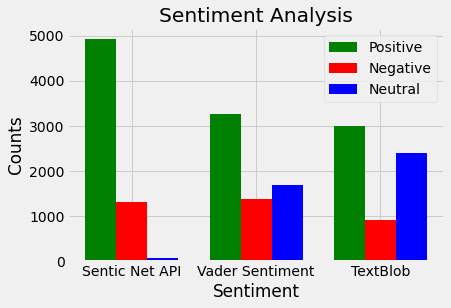

In [65]:
N = 3
ind = np.arange(N)
width = 0.25

xvals = [(data['sentic_polarity']=='POSITIVE').sum(),(data['vader_sentiments']=='POSITIVE').sum() ,(data['textblob_analysis']=='POSITIVE').sum()]
bar1 = plt.bar(ind, xvals, width, color = 'g')

yvals = [(data['sentic_polarity']=='NEGATIVE').sum(),(data['vader_sentiments']=='NEGATIVE').sum() ,(data['textblob_analysis']=='NEGATIVE').sum()]
bar2 = plt.bar(ind+width, yvals, width, color='r')

zvals = [(data['sentic_polarity']=='NEUTRAL').sum(),(data['vader_sentiments']=='NEUTRAL').sum() ,(data['textblob_analysis']=='NEUTRAL').sum()]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Sentiment")
plt.ylabel('Counts')
plt.title("Sentiment Analysis")

plt.xticks(ind+width,['Sentic Net API', 'Vader Sentiment', 'TextBlob'])
plt.legend( (bar1, bar2, bar3), ('Positive', 'Negative', 'Neutral') )
plt.show()


In [90]:
from sklearn.feature_extraction.text import CountVectorizer

immigration visa 198
canada immigration 174
visa prvisa 159
yaxis indianmigrants 152
indianmigrants migration 152
migration migrateabroad 152
quiz yaxisquiz 150
yaxisquiz win 150
win immigration 150
contestalert quiz 142
immigration immigrationnews 130
canadanews immigration 95
migrateabroad overseascareer 94
article canadanews 93
canada toronto 93
immigration law 92
overseascareer visa 89
title 42 88
global immigration 88
immigration canada 86


<AxesSubplot:title={'center':'Top 20 Bigrams in reviews after removing stop words'}, xlabel='text', ylabel='Count'>

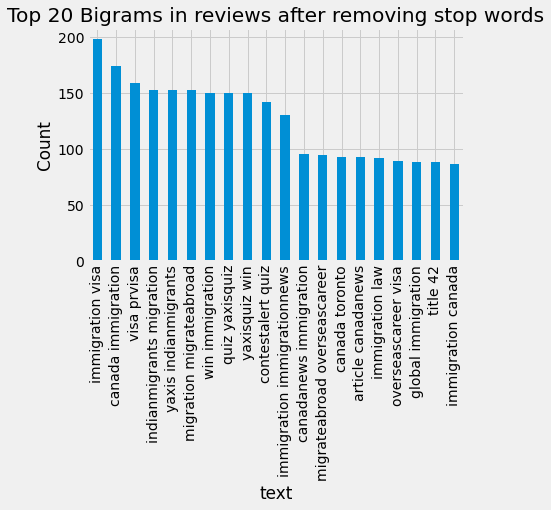

In [98]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(data['text'], 20)
for word, freq in common_words:
    print(word, freq)
data1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
data1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count', title='Top 20 Bigrams in reviews after removing stop words')


In [23]:
pos_tweet_sentic = data[data['sentic_polarity'] == 'POSITIVE']
neg_tweet_sentic = data[data['sentic_polarity'] == 'NEGATIVE']
neu_tweet_sentic = data[data['sentic_polarity'] == 'NEUTRAL']

pos_tweet_vader = data[data['vader_sentiments'] == 'POSITIVE']
neg_tweet_vader = data[data['vader_sentiments'] == 'NEGATIVE']
neu_tweet_vader = data[data['vader_sentiments'] == 'NEUTRAL']

pos_tweet_tb = data[data['textblob_analysis'] == 'POSITIVE']
neg_tweet_tb = data[data['textblob_analysis'] == 'NEGATIVE']
neu_tweet_tb = data[data['textblob_analysis'] == 'NEUTRAL']

In [24]:
pos_tokens_sentic = [token for line in pos_tweet_sentic['text'] for token in line.split()]
neg_tokens_sentic = [token for line in neg_tweet_sentic['text'] for token in line.split()]
neut_tokens_sentic = [token for line in neu_tweet_sentic['text'] for token in line.split()]

In [25]:
pos_tokens_vader = [token for line in pos_tweet_vader['text'] for token in line.split()]
neg_tokens_vader = [token for line in neg_tweet_vader['text'] for token in line.split()]
neut_tokens_vader = [token for line in neu_tweet_vader['text'] for token in line.split()]

In [26]:
pos_tokens_tb = [token for line in pos_tweet_tb['text'] for token in line.split()]
neg_tokens_tb = [token for line in neg_tweet_tb['text'] for token in line.split()]
neut_tokens_tb = [token for line in neu_tweet_tb['text'] for token in line.split()]

In [27]:
pos_tokens_sentic

['video',
 'answer',
 'question',
 'applying',
 'f',
 '1',
 'visa',
 'embassy',
 'share',
 'video',
 'f1',
 'studentvisa',
 'uscis',
 'greencard',
 'immigrationnews',
 'immigrationlawyer',
 'immigrationattorney',
 'jqklawfirm',
 'johnkhosravi',
 'immigration',
 'usimmigration',
 'susan',
 'rice',
 'ron',
 'klain',
 'appear',
 'problem',
 'getting',
 'administration',
 'solution',
 'immigration',
 'count',
 'nothing',
 'changing',
 'next',
 '2',
 '5',
 'years',
 'call',
 'us',
 'today',
 'immigration',
 'needs',
 '262',
 '764',
 '5036',
 'p',
 'represent',
 'clients',
 '50',
 'states',
 'amp',
 'worldwide',
 'immigration',
 'visa',
 'studyabroad',
 'immigrationlawyer',
 'studentvisa',
 'tps',
 'usimmigration',
 'immigrants',
 'studyinusa',
 'vawa',
 'immigtationattorney',
 'studyvisa',
 'conservatives',
 'libertarians',
 'democrats',
 'saying',
 'title',
 '42',
 'immigration',
 'bipartisan',
 'group',
 'us',
 'senators',
 'introduced',
 'bill',
 'passed',
 'would',
 'allow',
 'biden',
 

In [28]:
# Get Most Commonest Keywords
from collections import Counter

In [29]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [30]:
get_tokens(pos_tokens_sentic)

{'immigration': 4287,
 'visa': 2043,
 'canada': 1158,
 'us': 834,
 'amp': 636,
 'immigrants': 538,
 'new': 363,
 'call': 312,
 'get': 311,
 '1': 303,
 'study': 303,
 'uk': 299,
 'work': 292,
 'usa': 292,
 'immigrationlaw': 280,
 '2022': 267,
 'visit': 261,
 'law': 259,
 'migration': 250,
 'today': 240,
 'help': 234,
 'studentvisa': 231,
 'read': 223,
 'studyabroad': 220,
 'travel': 215,
 'contact': 212,
 'join': 208,
 'apply': 203,
 'border': 202,
 'australia': 200}

In [32]:
get_tokens(neg_tokens_sentic)

{'immigration': 1180,
 'immigrants': 343,
 'visa': 320,
 'border': 151,
 'amp': 141,
 'canada': 131,
 'us': 113,
 'illegal': 94,
 'people': 87,
 '1': 87,
 'asylum': 85,
 'policy': 81,
 'migrants': 70,
 'covid': 69,
 'refugees': 68,
 'migration': 68,
 'u': 67,
 'texas': 63,
 'ukraine': 63,
 'new': 62,
 'biden': 61,
 'years': 60,
 'usa': 59,
 'get': 59,
 'uk': 58,
 'immigrationlaw': 56,
 'undocumented': 55,
 'daca': 54,
 'country': 54,
 'trump': 54}

In [34]:
get_tokens(neut_tokens_sentic)

{'immigration': 67,
 'visa': 36,
 'us': 13,
 'canada': 10,
 'migration': 10,
 'studentvisa': 9,
 'know': 7,
 'migrationagent': 7,
 'visaconsultants': 7,
 'visit': 7,
 'experts': 6,
 'immigrationconsultant': 6,
 'visaservices': 6,
 'canadavisa': 5,
 'apexvisas': 5,
 'usa': 5,
 'immigrationlaw': 5,
 'call': 5,
 'uk': 5,
 'contact': 4,
 'studyincanada': 4,
 'canadapr': 4,
 '2022': 4,
 'immigrationnews': 4,
 'permanentresidence': 4,
 'oshc': 4,
 'bestmigrationservices': 4,
 'topmigrationagent': 4,
 'check': 4,
 'must': 4}

In [31]:
most_common_pos_words = get_tokens(pos_tokens_sentic)
most_common_neg_words = get_tokens(neg_tokens_sentic)
most_common_neut_words = get_tokens(neut_tokens_sentic)

In [78]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
neg_df

,words,scores
0,immigration,1180
1,immigrants,343
2,visa,320
3,border,151
4,amp,141
5,canada,131
6,us,113
7,illegal,94
8,people,87
9,1,87


In [113]:
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])


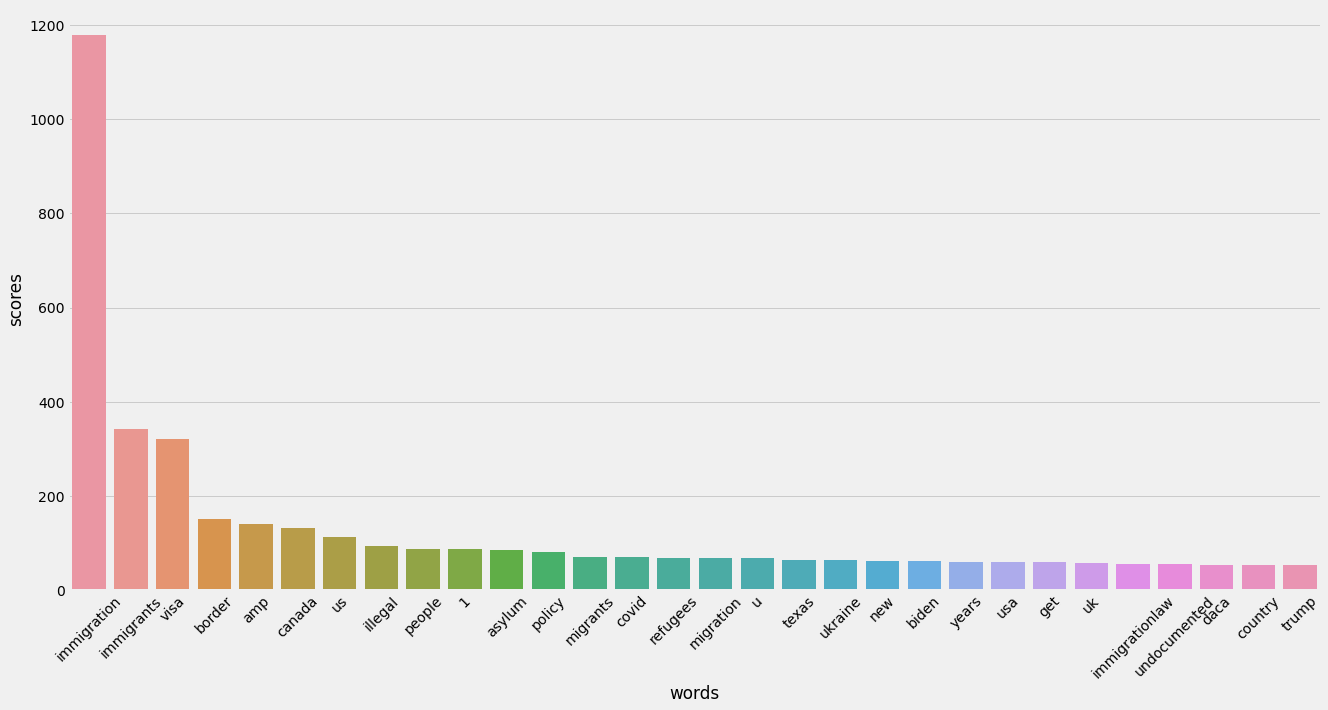

In [80]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

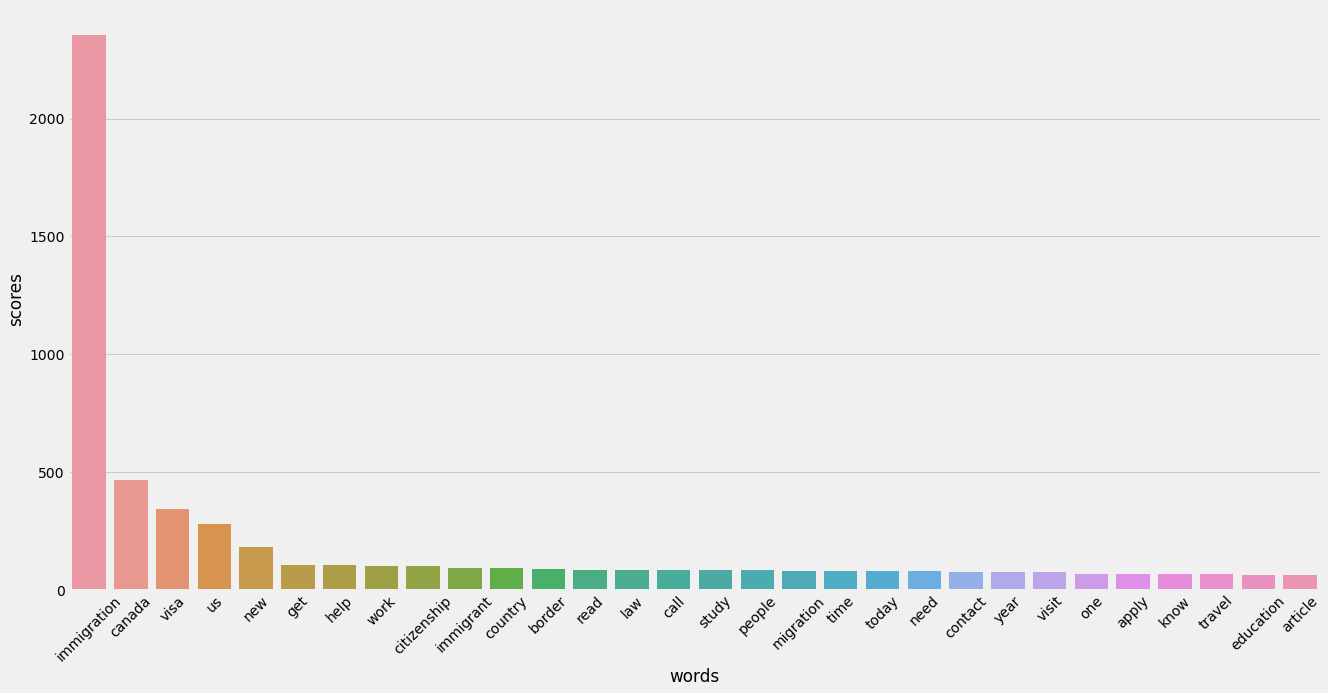

In [173]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

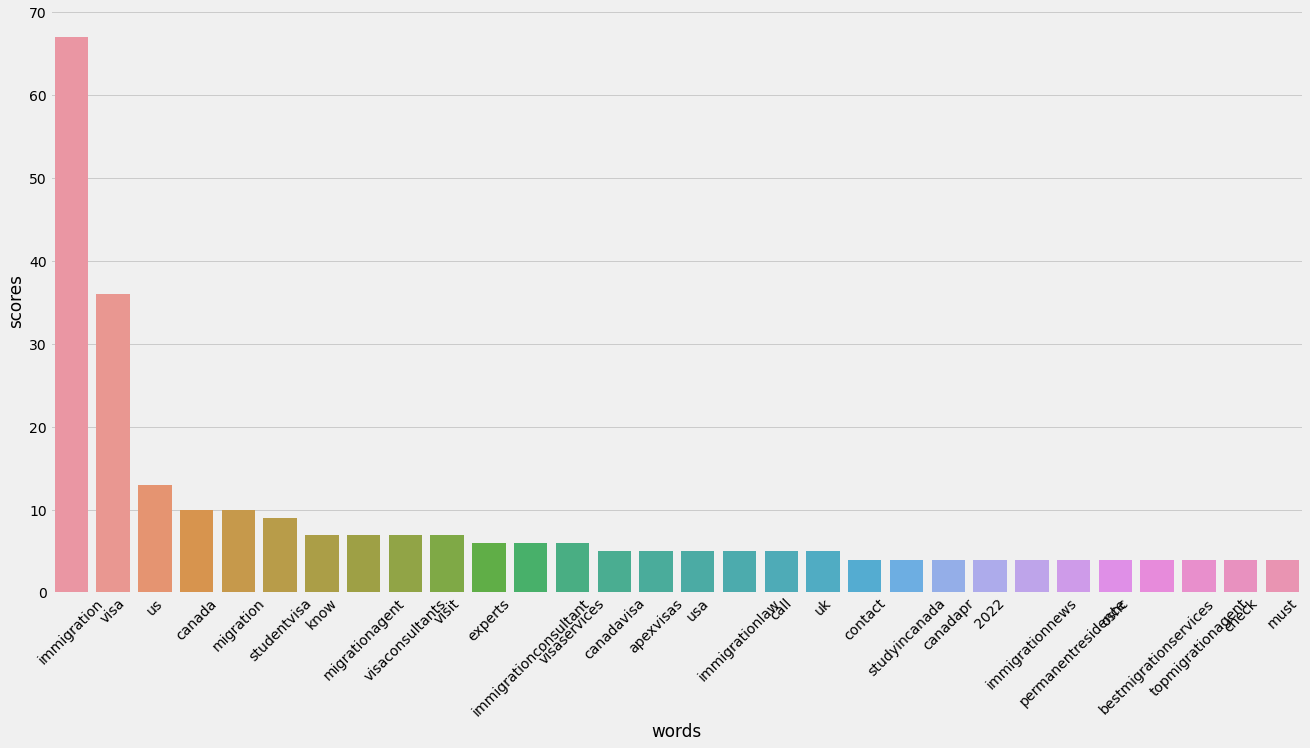

In [81]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

In [82]:
most_common_pos_words_vader = get_tokens(pos_tokens_vader)
most_common_neg_words_vader = get_tokens(neg_tokens_vader)
most_common_neut_words_vader = get_tokens(neut_tokens_vader)

In [83]:
# Plot with seaborn
neg_df_vader = pd.DataFrame(most_common_neg_words_vader.items(),columns=['words','scores'])
neg_df_vader

,words,scores
0,immigration,1250
1,immigrants,296
2,visa,259
3,amp,186
4,border,176
5,illegal,154
6,canada,136
7,us,127
8,biden,127
9,people,111


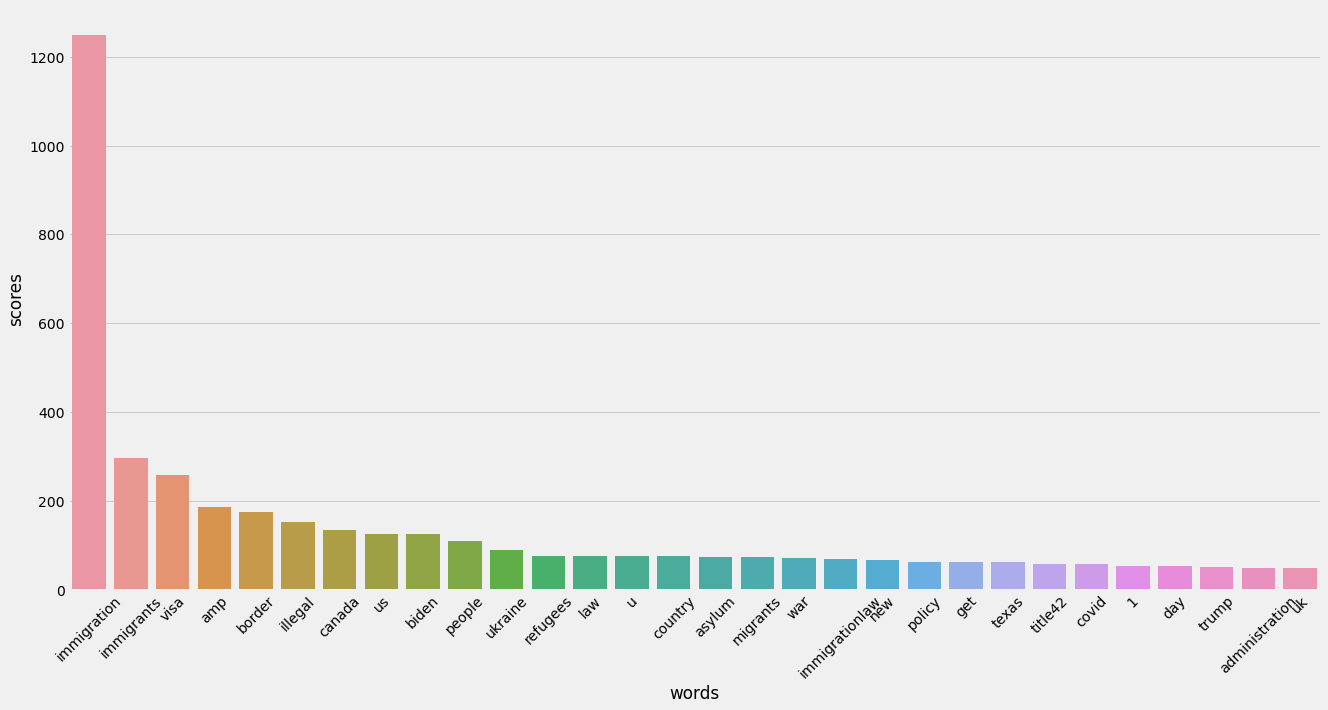

In [84]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df_vader)
plt.xticks(rotation=45)
plt.show()

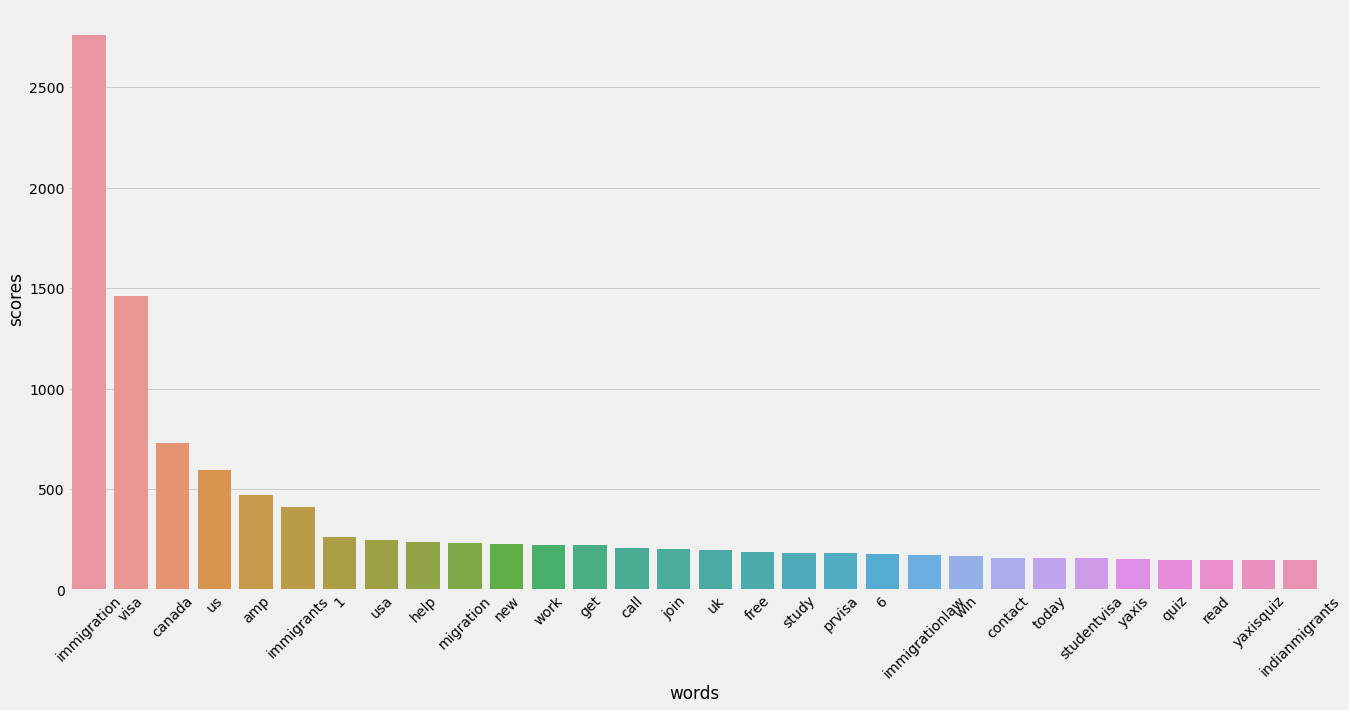

In [85]:
# Plot with seaborn
pos_df_vader = pd.DataFrame(most_common_pos_words_vader.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df_vader)
plt.xticks(rotation=45)
plt.show()

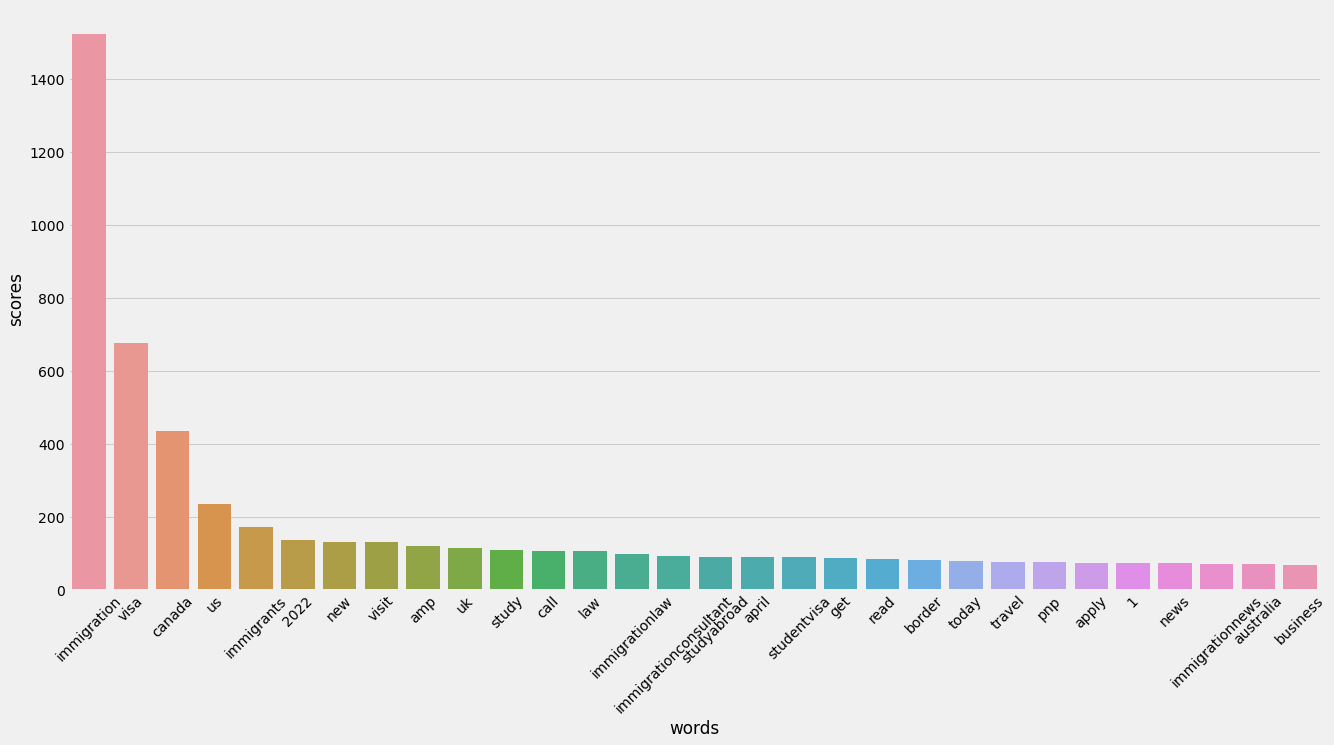

In [86]:
# Plot with seaborn
neut_df_vader = pd.DataFrame(most_common_neut_words_vader.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df_vader)
plt.xticks(rotation=45)
plt.show()

## Concept Parsing using SenticNet API

In [2]:
import pandas as pd

df = pd.read_csv("data/sample_scrape.csv")

df.shape

(6328, 1)

In [3]:
df1  = df.iloc[0:1000]
df2  = df.iloc[1001:2000]
df3  = df.iloc[2001:3000] 
df4  = df.iloc[3001:4000]
df5  = df.iloc[4001:5000]
df6  = df.iloc[5001:6000]
df7  = df.iloc[6001:6328]

In [5]:
import requests

LANG = 'en'
APIKEY = '***'
APIURL = 'https://sentic.net/api/' + LANG + '/' + APIKEY + '.py?text='

def process_data(tweets_df):
    tweets_df = tweets_df.dropna()
    num_tweets = tweets_df.shape[0]
    print("Total tweets: " + str(num_tweets))
    print("Beginning processing of tweets ")
    print(tweets_df.iloc[0][0])
    label_tweets=[]
    for i in range(num_tweets):
        label = polarity_api(tweets_df.iloc[i][0])
        label_tweets.append(label)
        if(i % 10 == 0):
            print(str(i) + " tweets processed")
    print("Finished processing of tweets ")
    return label_tweets

def polarity_api(raw_text):
    text=raw_text
    for c in [';', '&', '#', '{', '}']: text = text.replace(c, ':')
    label = str(requests.get(APIURL + text).content)[2:-3]
    return label
    
labels = process_data(df7) 
df7['sentic_concept']=labels
df7.head()

Total tweets: 327
Beginning processing of tweets 
others quoting similar watch dare politicslive asylum immigration
0 tweets processed
10 tweets processed
20 tweets processed
30 tweets processed
40 tweets processed
50 tweets processed
60 tweets processed
70 tweets processed
80 tweets processed
90 tweets processed
100 tweets processed
110 tweets processed
120 tweets processed
130 tweets processed
140 tweets processed
150 tweets processed
160 tweets processed
170 tweets processed
180 tweets processed
190 tweets processed
200 tweets processed
210 tweets processed
220 tweets processed
230 tweets processed
240 tweets processed
250 tweets processed
260 tweets processed
270 tweets processed
280 tweets processed
290 tweets processed
300 tweets processed
310 tweets processed
320 tweets processed
Finished processing of tweets 


<ipython-input-5-8fc34a2093d5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['sentic_concept']=labels


,text,sentic_concept
6001,others quoting similar watch dare politicslive...,"['quoting', 'similar', 'dare', 'asylum']"
6002,agree education learning institutions certific...,"['agree', 'education', 'learning', 'institutio..."
6003,politicslive sounding like less informed offsp...,"[NOT 'informed', 'offspring', 'govern']"
6004,looking immigration lawyers luton visit websit...,"['solicit', 'learn']"
6005,go immigration politicslive,"['N', 'o', ' ', 'c', 'o', 'n', 'c', 'e', 'p', ..."


In [6]:
df7.to_csv('data/concept_7.csv')

In [7]:
import requests

LANG = 'en'
APIKEY = '***'
APIURL = 'https://sentic.net/api/' + LANG + '/' + APIKEY + '.py?text='

def process_data(tweets_df):
    tweets_df = tweets_df.dropna()
    num_tweets = tweets_df.shape[0]
    print("Total tweets: " + str(num_tweets))
    print("Beginning processing of tweets ")
    print(tweets_df.iloc[0][0])
    label_tweets=[]
    for i in range(num_tweets):
        label = polarity_api(tweets_df.iloc[i][0])
        label_tweets.append(label)
        if(i % 100 == 0):
            print(str(i) + " tweets processed")
    print("Finished processing of tweets ")
    return label_tweets

def polarity_api(raw_text):
    text=raw_text
    for c in [';', '&', '#', '{', '}']: text = text.replace(c, ':')
    label = str(requests.get(APIURL + text).content)[2:-3]
    return label
    
labels = process_data(df5) 
df5['sentic_concept']=labels
df5.head()

Total tweets: 999
Beginning processing of tweets 
bidenflation crisis exasperated liberal policies favor illegal immigrants american citizens joebiden choosing feed 2 million illegal aliens americans proof democratsaredestroyingamerica
0 tweets processed
100 tweets processed
200 tweets processed
300 tweets processed
400 tweets processed
500 tweets processed
600 tweets processed
700 tweets processed
800 tweets processed
900 tweets processed
Finished processing of tweets 


<ipython-input-7-ae49171d7da2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['sentic_concept']=labels


,text,sentic_concept
4001,bidenflation crisis exasperated liberal polici...,"['crisis', 'exasperate', 'liberal', 'policies'..."
4002,louisiana want stop detaining immigrants borde...,"['louisiana', NOT 'detain', 'immigrants', 'doz..."
4003,iiba make car donation process free simple don...,"['car', 'spread word', 'donation', 'process', ..."
4004,daughter immigrants benefited greatly civil ri...,"['california', 'daughter', 'immigrants', 'bene..."
4005,immigrants mexicans racism hamilton mixtape im...,"['hamilton', 'get job', 'immigrants', 'racism']"


In [8]:
df5.to_csv('data/concept_5.csv')

In [7]:
import requests

LANG = 'en'
APIKEY = '***'
APIURL = 'https://sentic.net/api/' + LANG + '/' + APIKEY + '.py?text='

def process_data(tweets_df):
    tweets_df = tweets_df.dropna()
    num_tweets = tweets_df.shape[0]
    print("Total tweets: " + str(num_tweets))
    print("Beginning processing of tweets ")
    print(tweets_df.iloc[0][0])
    label_tweets=[]
    for i in range(num_tweets):
        label = polarity_api(tweets_df.iloc[i][0])
        label_tweets.append(label)
        if(i % 10 == 0):
            print(str(i) + " tweets processed")
    print("Finished processing of tweets ")
    return label_tweets

def polarity_api(raw_text):
    text=raw_text
    for c in [';', '&', '#', '{', '}']: text = text.replace(c, ':')
    label = str(requests.get(APIURL + text).content)[2:-3]
    return label
    
labels = process_data(df6) 
df6['sentic_concept']=labels
df6.head()

Total tweets: 999
Beginning processing of tweets 
worried work permit extention worry assisst info contact us today visa visaplus canadaimmigration canada immigration canadavisa expressentry canadapr studyincanada visa
0 tweets processed
10 tweets processed
20 tweets processed
30 tweets processed
40 tweets processed
50 tweets processed
60 tweets processed
70 tweets processed
80 tweets processed
90 tweets processed
100 tweets processed
110 tweets processed
120 tweets processed
130 tweets processed
140 tweets processed
150 tweets processed
160 tweets processed
170 tweets processed
180 tweets processed
190 tweets processed
200 tweets processed
210 tweets processed
220 tweets processed
230 tweets processed
240 tweets processed
250 tweets processed
260 tweets processed
270 tweets processed
280 tweets processed
290 tweets processed
300 tweets processed
310 tweets processed
320 tweets processed
330 tweets processed
340 tweets processed
350 tweets processed
360 tweets processed
370 tweets proc

<ipython-input-7-ef962423d66f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['sentic_concept']=labels


,text,sentic_concept
5001,worried work permit extention worry assisst in...,"['canada', 'worried', 'work', 'permit', 'exten..."
5002,refreshing honest spin op ed immigration worth...,"['washington', 'refreshing', 'honest', 'spin',..."
5003,latest legal content curated lawmarketer blawg...,"['latest', 'legal', 'content', 'curate']"
5004,start promising career canada know experts dm ...,"['canada', 'promising']"
5005,start promising career canada know experts dm ...,"['canada', 'promising']"


In [8]:
df6.to_csv('data/concept_6.csv')

In [46]:
df1= pd.read_csv("data/polarity_labelled1.csv")
df2= pd.read_csv("data/polarity_labelled2.csv")
df3= pd.read_csv("data/polarity_labelled3.csv")
df4= pd.read_csv("data/polarity_labelled4.csv")
df5= pd.read_csv("data/polarity_labelled5.csv")
df6= pd.read_csv("data/polarity_labelled6.csv")
df7= pd.read_csv("data/polarity_labelled7.csv")

In [47]:
frames = [df1, df2, df3, df4, df5, df6, df7]
  
result = pd.concat(frames)

In [48]:
result.shape

(6322, 3)

In [25]:
result.drop(columns=['Unnamed: 0'])

,text,sentic_concept
0,video answer question applying f 1 visa embass...,"['answer', 'share']"
1,susan rice ron klain appear problem getting ad...,"['appear', 'administration', 'solution', 'coun..."
2,call us today immigration needs 262 764 5036 p...,"['needy', 'present', 'clients', 'worldwide', '..."
3,conservatives libertarians democrats saying ti...,['conservative libertarian']
4,bipartisan group us senators introduced bill p...,"['group', 'senators', 'bide', 'administration'..."
...,...,...
322,immigration breakdown open borders working kee...,"['breakdown', 'work', 'drugs']"
323,dream make true us study australia contact us ...,"['australia', 'dream', 'study', 'information']"
324,immigrants continue essential need deliver pro...,"['immigrants', 'continue', 'essential', 'deliv..."
325,new 50 immigrant leaders across country urging...,"['country', 'immigrant', 'leader', 'urge', 'bi..."


In [23]:
result.to_csv("data/Concept_Parsed_SenticNet.csv")

In [15]:
df=pd.read_csv("data/Concept_Parsed_SenticNet.csv")
df

,text,sentic_concept
0,video answer question applying f 1 visa embass...,"['answer', 'share']"
1,susan rice ron klain appear problem getting ad...,"['appear', 'administration', 'solution', 'coun..."
2,call us today immigration needs 262 764 5036 p...,"['needy', 'present', 'clients', 'worldwide', '..."
3,conservatives libertarians democrats saying ti...,['conservative libertarian']
4,bipartisan group us senators introduced bill p...,"['group', 'senators', 'bide', 'administration'..."
...,...,...
6317,immigration breakdown open borders working kee...,"['breakdown', 'work', 'drugs']"
6318,dream make true us study australia contact us ...,"['australia', 'dream', 'study', 'information']"
6319,immigrants continue essential need deliver pro...,"['immigrants', 'continue', 'essential', 'deliv..."
6320,new 50 immigrant leaders across country urging...,"['country', 'immigrant', 'leader', 'urge', 'bi..."


In [16]:
data['concepts'] = df['sentic_concept']

In [17]:
data

,Unnamed: 0,text,sentic_polarity,vader_sentiments,textblob_subjectivity,textblob_polarity,textblob_analysis,concepts
0,0,video answer question applying f 1 visa embass...,POSITIVE,POSITIVE,0.000000,0.000000,NEUTRAL,"['answer', 'share']"
1,1,susan rice ron klain appear problem getting ad...,POSITIVE,NEGATIVE,0.000000,0.000000,NEUTRAL,"['appear', 'administration', 'solution', 'coun..."
2,2,call us today immigration needs 262 764 5036 p...,POSITIVE,NEUTRAL,0.000000,0.000000,NEUTRAL,"['needy', 'present', 'clients', 'worldwide', '..."
3,3,conservatives libertarians democrats saying ti...,POSITIVE,POSITIVE,0.000000,0.000000,NEUTRAL,['conservative libertarian']
4,4,bipartisan group us senators introduced bill p...,POSITIVE,NEGATIVE,0.000000,0.000000,NEUTRAL,"['group', 'senators', 'bide', 'administration'..."
...,...,...,...,...,...,...,...,...
6317,6317,immigration breakdown open borders working kee...,POSITIVE,NEUTRAL,0.500000,0.000000,NEUTRAL,"['breakdown', 'work', 'drugs']"
6318,6318,dream make true us study australia contact us ...,POSITIVE,POSITIVE,0.325000,0.175000,POSITIVE,"['australia', 'dream', 'study', 'information']"
6319,6319,immigrants continue essential need deliver pro...,POSITIVE,POSITIVE,0.300000,0.000000,NEUTRAL,"['immigrants', 'continue', 'essential', 'deliv..."
6320,6320,new 50 immigrant leaders across country urging...,POSITIVE,POSITIVE,0.277273,0.118182,POSITIVE,"['country', 'immigrant', 'leader', 'urge', 'bi..."


In [18]:
data.to_csv("data/Comparison_with_all_the_concepts.csv")

## Analysing Mislabelled Tweets

In [360]:
# Importing functions and classes from utility module
from w2v_utils import (Tokenizer,
                       evaluate_model,
                       w2v_trainer,
                       overall_semantic_sentiment_analysis,
                       topn_semantic_sentiment_analysis,
)

In [311]:
# Instancing the Tokenizer class
tokenizer = Tokenizer(clean= True,
                      lower= True, 
                      de_noise= True, 
                      remove_stop_words= True,
                      keep_negation=True)

In [314]:
# Find the most similar words to "good" based on word vectors from our trained model
keyed_vectors.most_similar('good',topn=15)

[('congress', 0.9975775480270386),
 ('house', 0.9975663423538208),
 ('going', 0.997491717338562),
 ('keep', 0.9970858693122864),
 ('turn', 0.9967980980873108),
 ('borders', 0.9966645836830139),
 ('bill', 0.996406078338623),
 ('guard', 0.9963725805282593),
 ('president', 0.9961864948272705),
 ('said', 0.9960742592811584),
 ('millions', 0.9959810972213745),
 ('troopers', 0.9955525994300842),
 ('resulting', 0.995473325252533),
 ('promise', 0.9954004883766174),
 ('apprehended', 0.995361328125)]

In [361]:
df = pd.read_csv("data/Polarity_Labelled_SenticNet.csv")

In [362]:
df

,text,sentic_polarity
0,video answer question applying f 1 visa embass...,POSITIVE
1,susan rice ron klain appear problem getting ad...,POSITIVE
2,call us today immigration needs 262 764 5036 p...,POSITIVE
3,conservatives libertarians democrats saying ti...,POSITIVE
4,bipartisan group us senators introduced bill p...,POSITIVE
...,...,...
6317,immigration breakdown open borders working kee...,POSITIVE
6318,dream make true us study australia contact us ...,POSITIVE
6319,immigrants continue essential need deliver pro...,POSITIVE
6320,new 50 immigrant leaders across country urging...,POSITIVE


In [363]:
df['sentic_polarity'].replace(['POSITIVE','NEGATIVE','NEUTRAL'],[1,0,-1],inplace=True)


In [364]:
df.drop(df.loc[df['sentic_polarity']==-1].index, inplace=True)

In [365]:
df['sentic_polarity'].value_counts()

1    4921
0    1319
Name: sentic_polarity, dtype: int64

In [366]:
df.shape

(6240, 2)

In [330]:
pos_concepts_tweets=[]
for ind in df.index:
     if df['sentic_polarity'][ind]==1:
        pos_concepts_tweets.append(df['text'][ind])


In [331]:
neg_concepts_tweets=[]
for ind in df.index:
     if df['sentic_polarity'][ind]==0:
        neg_concepts_tweets.append(df['text'][ind])

In [332]:
df_concepts = pd.read_csv("data/Concept_Parsed_SenticNet.csv")

In [333]:
pos_concepts=[]
for i in pos_concepts_tweets:
    data_ex =df_concepts.loc[df_concepts['text'] == i, 'sentic_concept']
    data_ex.reset_index(drop=True, inplace=True)
    pos_concepts.append(data_ex[0].strip('[]').strip(' ').replace("'", "").replace(" ","").split(','))



In [334]:
pos_concepts

[['answer', 'share'],
 ['appear', 'administration', 'solution', 'count', 'NOTchanging'],
 ['needy', 'present', 'clients', 'worldwide', 'immigrants'],
 ['conservativelibertarian'],
 ['group',
  'senators',
  'bide',
  'administration',
  'emergency',
  'declare',
  'NOTcovid',
  'declaration'],
 ['nextgeneration',
  'join',
  'celebrate',
  'bold',
  'legacy',
  'work',
  'justice',
  'foster',
  'legal',
  'bolder'],
 ['immigrant', 'founde', 'phobia', 'discriminate'],
 ['keeper', 'insight', 'childhood', 'child', 'holocaust'],
 ['germany',
  'india',
  'surat',
  'amritsar',
  'ludhiana',
  'love',
  'travel',
  'trending',
  'NOTternate',
  'euro',
  'tourist',
  'follow'],
 ['tariff', 'reduction', 'help', 'fight', 'inflation'],
 ['unsustainable',
  'policies',
  'bide',
  'administration',
  'benefit',
  'publican',
  'southern'],
 ['follow', 'populism', 'democracy'],
 ['usa',
  'share',
  'immigrants',
  'grace',
  'govern',
  'remove',
  'negro',
  'printing',
  'birth',
  'pro',
  

In [335]:
list_of_pos_words = []
for l in pos_concepts:
    for i in l:
        list_of_pos_words.append(i)


In [336]:
list_of_pos_words

['answer',
 'share',
 'appear',
 'administration',
 'solution',
 'count',
 'NOTchanging',
 'needy',
 'present',
 'clients',
 'worldwide',
 'immigrants',
 'conservativelibertarian',
 'group',
 'senators',
 'bide',
 'administration',
 'emergency',
 'declare',
 'NOTcovid',
 'declaration',
 'nextgeneration',
 'join',
 'celebrate',
 'bold',
 'legacy',
 'work',
 'justice',
 'foster',
 'legal',
 'bolder',
 'immigrant',
 'founde',
 'phobia',
 'discriminate',
 'keeper',
 'insight',
 'childhood',
 'child',
 'holocaust',
 'germany',
 'india',
 'surat',
 'amritsar',
 'ludhiana',
 'love',
 'travel',
 'trending',
 'NOTternate',
 'euro',
 'tourist',
 'follow',
 'tariff',
 'reduction',
 'help',
 'fight',
 'inflation',
 'unsustainable',
 'policies',
 'bide',
 'administration',
 'benefit',
 'publican',
 'southern',
 'follow',
 'populism',
 'democracy',
 'usa',
 'share',
 'immigrants',
 'grace',
 'govern',
 'remove',
 'negro',
 'printing',
 'birth',
 'pro',
 'lineage',
 'reparation',
 'moratorium',
 'app

In [337]:
neg_concepts=[]
for i in neg_concepts_tweets:
    data_ex =df_concepts.loc[df_concepts['text'] == i, 'sentic_concept']
    data_ex.reset_index(drop=True, inplace=True)
    neg_concepts.append(data_ex[0].strip('[]').strip(' ').replace("'", "").replace(" ","").split(','))

In [338]:
neg_concepts

[['illegal', 'alien', 'safe', 'dacer'],
 ['texas', 'problem', 'govern', 'NOToffer', 'political', 'stunt'],
 ['recession',
  'employer',
  'roll',
  'unrest',
  'ensue',
  'barre',
  'granite',
  'strike',
  'journal',
  'walkout',
  'occur',
  'textile'],
 ['ukraine',
  'neonazi',
  'justification',
  'horrible',
  'policy',
  'portray',
  'possible',
  'spies',
  'dissimilar',
  'putin',
  'attempt',
  'brainwash'],
 ['charge'],
 ['shadow', 'demanding', 'sanction', 'publish', 'report', 'scrap', 'purchase'],
 ['house',
  'mexico',
  'venezuela',
  'guatemala',
  'NOTagree',
  'delay',
  'infighting',
  'divided',
  'dacer',
  'asylum',
  'citizenship'],
 ['canada',
  'toronto',
  'unemployment',
  'rate',
  'immigrants',
  'historic',
  'NOTfull',
  'record',
  'statistics'],
 ['staff',
  'agriculture',
  'scheme',
  'revision',
  'tackle',
  'shortage',
  'recruitment'],
 ['nagoya',
  'woman',
  'japan',
  'detention',
  'restrictions',
  'freedom',
  'assault',
  'arrest',
  'norm',


In [339]:
list_of_neg_words = []
for l in neg_concepts:
    for i in l:
        list_of_neg_words.append(i)

In [340]:
list_of_neg_words

['illegal',
 'alien',
 'safe',
 'dacer',
 'texas',
 'problem',
 'govern',
 'NOToffer',
 'political',
 'stunt',
 'recession',
 'employer',
 'roll',
 'unrest',
 'ensue',
 'barre',
 'granite',
 'strike',
 'journal',
 'walkout',
 'occur',
 'textile',
 'ukraine',
 'neonazi',
 'justification',
 'horrible',
 'policy',
 'portray',
 'possible',
 'spies',
 'dissimilar',
 'putin',
 'attempt',
 'brainwash',
 'charge',
 'shadow',
 'demanding',
 'sanction',
 'publish',
 'report',
 'scrap',
 'purchase',
 'house',
 'mexico',
 'venezuela',
 'guatemala',
 'NOTagree',
 'delay',
 'infighting',
 'divided',
 'dacer',
 'asylum',
 'citizenship',
 'canada',
 'toronto',
 'unemployment',
 'rate',
 'immigrants',
 'historic',
 'NOTfull',
 'record',
 'statistics',
 'staff',
 'agriculture',
 'scheme',
 'revision',
 'tackle',
 'shortage',
 'recruitment',
 'nagoya',
 'woman',
 'japan',
 'detention',
 'restrictions',
 'freedom',
 'assault',
 'arrest',
 'norm',
 'unjust',
 'torture',
 'dies',
 'hunger',
 'illegal',
 'sm

In [341]:
from collections import Counter
c_n = Counter(list_of_pos_words)
required = (([(l,k) for k,l in sorted([(j,i) for i,j in c_n.items()], reverse=True)][:50]))

req_pos_concepts = []
for i in required:
    req_pos_concepts.append(i[0])

In [342]:
req_pos_concepts

['canada',
 'immigrants',
 'work',
 'help',
 'usa',
 'study',
 'travel',
 'country',
 'application',
 'join',
 'apple',
 'student',
 'family',
 'education',
 'citizenship',
 'bide',
 'process',
 'govern',
 'australia',
 'ukraine',
 'information',
 'win',
 'free',
 'immigrant',
 'learn',
 'info',
 'full',
 'qui',
 'update',
 'toronto',
 'legal',
 'share',
 'policy',
 'attorney',
 'job',
 'india',
 'covid',
 'register',
 'support',
 'live',
 'illegal',
 'happy',
 'community',
 'latest',
 'best',
 'home',
 'detail',
 'texas',
 'create',
 'vancouver']

In [343]:
from collections import Counter
c_n = Counter(list_of_neg_words)
required = (([(l,k) for k,l in sorted([(j,i) for i,j in c_n.items()], reverse=True)][:50]))

req_neg_concepts = []
for i in required:
    req_neg_concepts.append(i[0])



In [344]:
req_neg_concepts

['immigrants',
 'canada',
 'policy',
 'covid',
 'illegal',
 'country',
 'usa',
 'bide',
 'ukraine',
 'asylum',
 'dacer',
 'texas',
 'win',
 'mexico',
 'crime',
 'qui',
 'job',
 'policies',
 'work',
 'pandemic',
 'status',
 'govern',
 'free',
 'restrictions',
 'help',
 'crisis',
 'southern',
 'citizenship',
 'announced',
 'NOTternate',
 'travel',
 'inflation',
 'immigrant',
 'house',
 'consultant',
 'apple',
 'legal',
 'employment',
 'tag',
 'russia',
 'racism',
 'needy',
 'surge',
 'problem',
 'phobia',
 'issues',
 'health',
 'backlog',
 'administration',
 'laws']

In [368]:
# To make sure that all `positive_concepts` are in the keyed word2vec vocabulary
# positive_concepts = ['excellent', 'awesome', 'cool','decent','amazing', 'strong', 'good', 'great', 'funny', 'entertaining'] 
pos_concepts = [concept for concept in req_pos_concepts if concept in keyed_vocab]
len(req_pos_concepts)

50

In [370]:
# To make sure that all `negative_concepts` are in the keyed word2vec vocabulary 
# req_neg_concepts = ['terrible','awful','horrible','boring','bad', 'disappointing', 'weak', 'poor',  'senseless','confusing'] 
neg_concepts = [concept for concept in req_neg_concepts if concept in keyed_vocab]
len(req_neg_concepts)

50

In [371]:
# Tokenize reviews
import numpy as np
df['tokenized_text'] = df['text'].apply(tokenizer.tokenize)

df['tokenized_text_len'] = df['tokenized_text'].apply(len)
df['tokenized_text_len'].apply(np.log).describe()

count    6240.000000
mean        2.875184
std         0.421326
min         0.693147
25%         2.639057
50%         2.995732
75%         3.178054
max         3.951244
Name: tokenized_text_len, dtype: float64

In [372]:
%%time
# Training a Word2Vec model
keyed_vectors, keyed_vocab = w2v_trainer(df['tokenized_text'],
                                               epochs=10,
                                               workers=3,
                                               vector_size=300,
                                               window=5,
                                               min_count=2)


Wall time: 1.85 s


In [373]:
# Calculating Semantic Sentiment Scores by OSSA model
overall_df_scores = overall_semantic_sentiment_analysis (keyed_vectors = keyed_vectors,
                                                   positive_target_tokens = pos_concepts, 
                                                   negative_target_tokens = neg_concepts,
                                                   doc_tokens = df['tokenized_text'])

# Calculating Semantic Sentiment Scores by TopSSA model
topn_df_scores = topn_semantic_sentiment_analysis (keyed_vectors = keyed_vectors,
                                                   positive_target_tokens = pos_concepts, 
                                                   negative_target_tokens = neg_concepts,
                                                   doc_tokens = df['tokenized_text'],
                                                     topn=30)


# To store semantic sentiment store computed by OSSA model in df
df['overall_PSS'] = overall_df_scores[0] 
df['overall_NSS'] = overall_df_scores[1] 
df['overall_semantic_sentiment_score'] = overall_df_scores[2] 
df['overall_semantic_sentiment_polarity'] = overall_df_scores[3]



# To store semantic sentiment store computed by TopSSA model in df
df['topn_PSS'] = topn_df_scores[0] 
df['topn_NSS'] = topn_df_scores[1] 
df['topn_semantic_sentiment_score'] = topn_df_scores[2] 
df['topn_semantic_sentiment_polarity'] = topn_df_scores[3]

In [374]:
df

,text,sentic_polarity,tokenized_text,tokenized_text_len,overall_PSS,overall_NSS,overall_semantic_sentiment_score,overall_semantic_sentiment_polarity,topn_PSS,topn_NSS,topn_semantic_sentiment_score,topn_semantic_sentiment_polarity
0,video answer question applying f 1 visa embass...,1,"[video, answer, question, applying, f, 1, visa...",21,0.948969,0.852999,0.095970,1,0.676425,0.676439,-0.000014,0
1,susan rice ron klain appear problem getting ad...,1,"[susan, rice, ron, klain, appear, problem, get...",17,0.847121,0.880766,-0.033645,0,0.679927,0.753437,-0.073511,0
2,call us today immigration needs 262 764 5036 p...,1,"[call, us, today, immigration, needs, 262, 764...",27,0.965484,0.832724,0.132760,1,0.671427,0.656713,0.014715,1
3,conservatives libertarians democrats saying ti...,1,"[conservatives, libertarians, democrats, sayin...",7,0.811415,0.956621,-0.145206,0,0.694720,0.811569,-0.116849,0
4,bipartisan group us senators introduced bill p...,1,"[bipartisan, group, us, senators, introduced, ...",25,0.854440,0.975947,-0.121507,0,0.692493,0.816183,-0.123690,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6317,immigration breakdown open borders working kee...,1,"[immigration, breakdown, open, borders, workin...",7,0.939094,0.995796,-0.056702,0,0.746244,0.834619,-0.088375,0
6318,dream make true us study australia contact us ...,1,"[dream, make, true, us, study, australia, cont...",20,0.896567,0.711190,0.185377,1,0.646289,0.581890,0.064400,1
6319,immigrants continue essential need deliver pro...,1,"[immigrants, continue, essential, need, delive...",14,0.955684,0.994166,-0.038482,0,0.739530,0.808983,-0.069453,0
6320,new 50 immigrant leaders across country urging...,1,"[new, 50, immigrant, leaders, across, country,...",20,0.899539,0.989685,-0.090146,0,0.735350,0.830805,-0.095455,0


              precision    recall  f1-score   support

           0     0.6649    0.3228    0.4346      2717
           1     0.6261    0.8745    0.7297      3523

    accuracy                         0.6343      6240
   macro avg     0.6455    0.5987    0.5822      6240
weighted avg     0.6430    0.6343    0.6012      6240



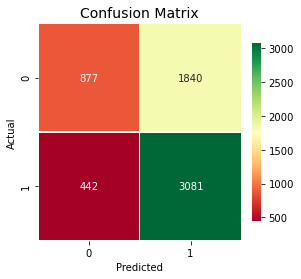

In [355]:
y_test = df['overall_semantic_sentiment_polarity']
y_pred_SenticNet = df['sentic_polarity']
evaluate_model(y_true = y_test, 
                         y_pred = y_pred_SenticNet, 
                         report=True,
                         plot=True)

In [375]:
df['sentic_polarity'].value_counts()

1    4921
0    1319
Name: sentic_polarity, dtype: int64

In [376]:
df['overall_semantic_sentiment_polarity'].value_counts()

1    3478
0    2762
Name: overall_semantic_sentiment_polarity, dtype: int64

In [358]:
# OSSA Model Evaluation
print("OSSA Model Evaluation: ")
evaluate_model(df['sentic_polarity'], 
               df['overall_semantic_sentiment_polarity'])

print("=======================")

# TopSSA Model Evaluation
print("TopSSA Model Evaluation: ")
evaluate_model(df['sentic_polarity'], 
               df['topn_semantic_sentiment_polarity'])

OSSA Model Evaluation: 
* Accuracy Score:  63.4295%
* F1 Score:  72.9749%
* Recall Score:  62.6092%
* Precision Score:  87.4539%
TopSSA Model Evaluation: 
* Accuracy Score:  39.8397%
* F1 Score:  41.4535%
* Recall Score:  27.0067%
* Precision Score:  89.1348%
